<a href="https://colab.research.google.com/github/wtfazz/codsoft_internship/blob/main/titanic_pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/Titanic-Dataset.csv")

In [ ]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].bfill()

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [ ]:
x = df[["Pclass","Sex","Age"]]
y = df["Survived"]

In [ ]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

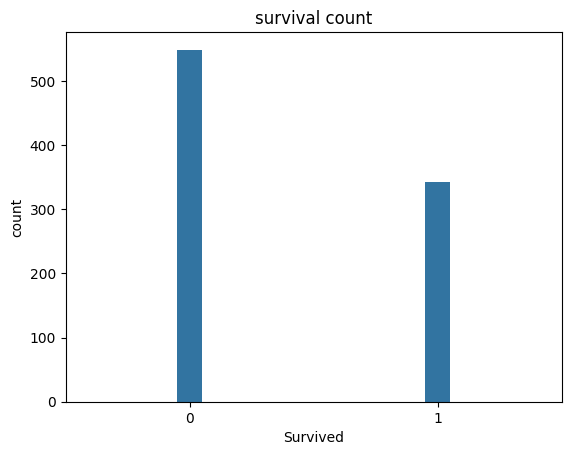

In [ ]:
plt.title("survival count")
sns.countplot(x=y,width=0.10)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dt.predict(x)

In [ ]:
dt.pred

In [ ]:
df1 = pd.DataFrame({"survved":y,"survivied prediction":y_pred})
df1.head()

,survved,survivied prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


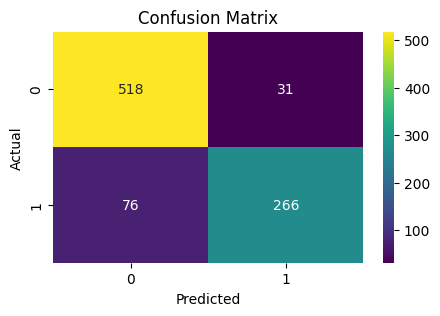

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, cmap="viridis",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       549
           1       0.90      0.78      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.8799102132435466

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Sex
1    577
0    314
Name: count, dtype: int64


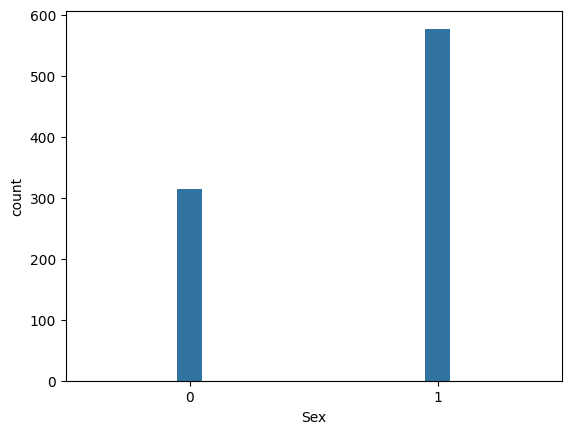

In [ ]:
print(df["Sex"].value_counts())
sns.countplot(x = df["Sex"],width = 0.10);
# [male = 0, female = 1]


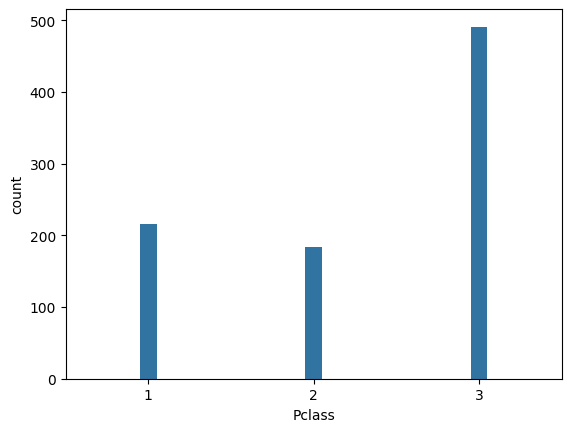

In [ ]:
sns.countplot(x = df["Pclass"],width = 0.10);

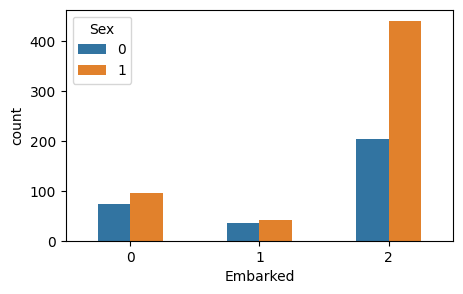

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(df, x ="Embarked",width = 0.5,hue = "Sex");
# [S=2],[Q=1],[C=0]

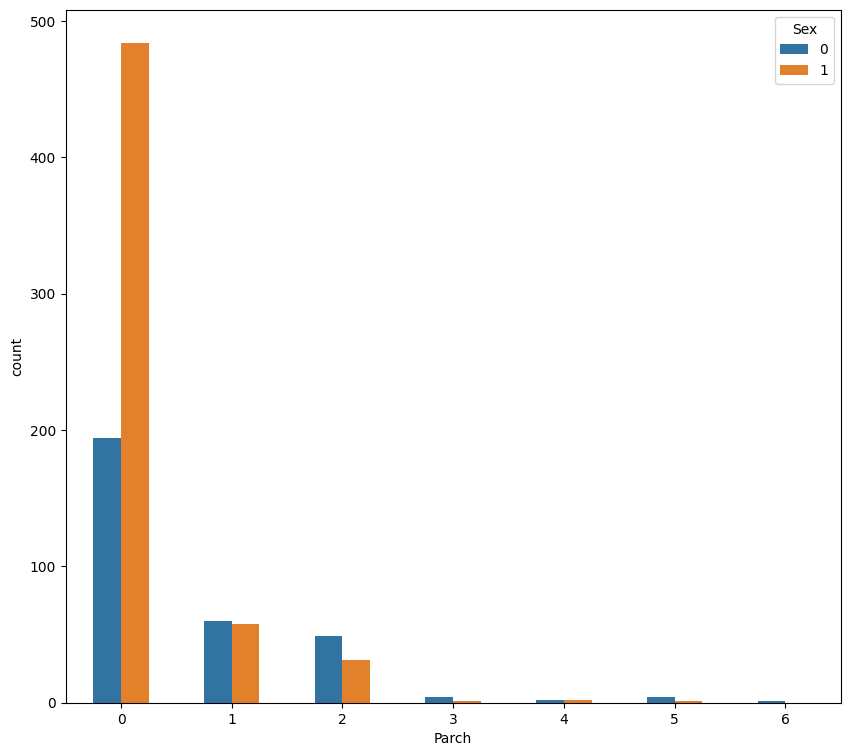

In [ ]:
plt.figure(figsize =(10,9))
sns.countplot(df,x ="Parch",width = 0.5,hue = "Sex");

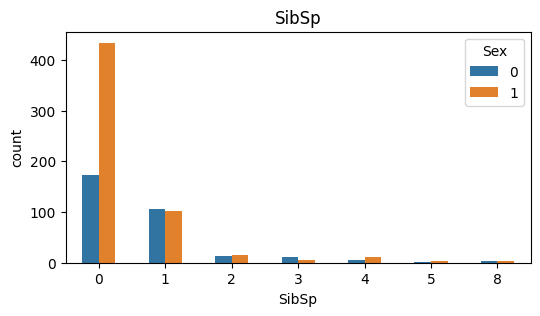

In [ ]:
plt.figure(figsize =(6,3))
sns.countplot(df ,x ="SibSp",width = 0.5,hue = "Sex");
plt.title("SibSp");
plt.show()

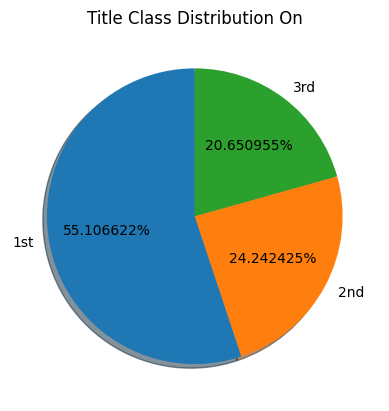

In [ ]:
a,b,c = df["Pclass"].value_counts()
x = [a,b,c]
l = ["1st","2nd","3rd"]
plt.title("Title Class Distribution On")
plt.pie(x,labels = l,autopct = "%f%%",labeldistance = 1.1 , shadow = True,startangle = 90);

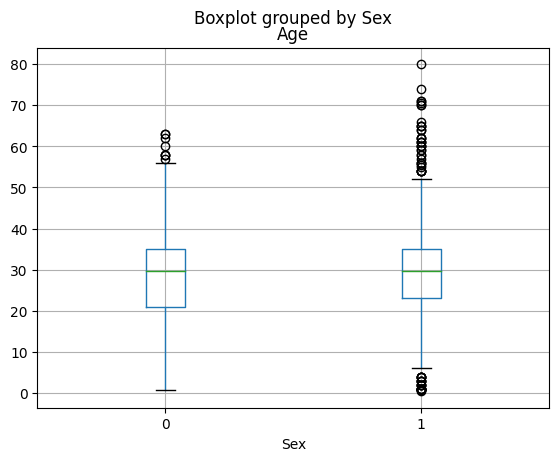

In [ ]:
df.boxplot(column ="Age", by="Sex");

<Axes: xlabel='Age', ylabel='Count'>

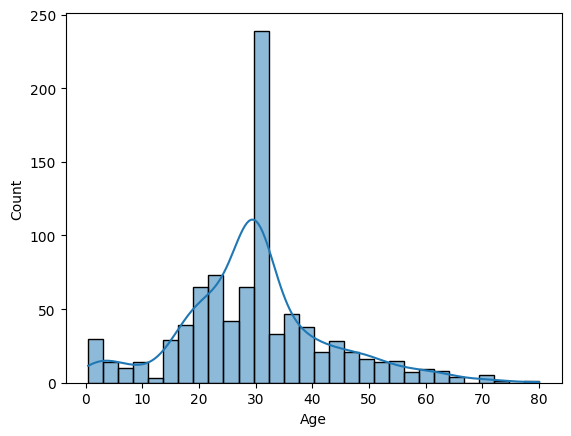

In [ ]:
sns.histplot(df["Age"], kde =True)

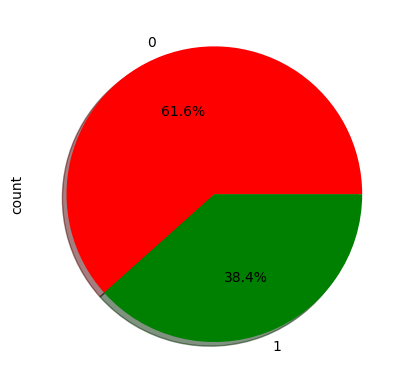

In [ ]:
df["Survived"].value_counts().plot(kind = "pie",autopct ="%1.1f%%",colors=["Red","green"], shadow = True);

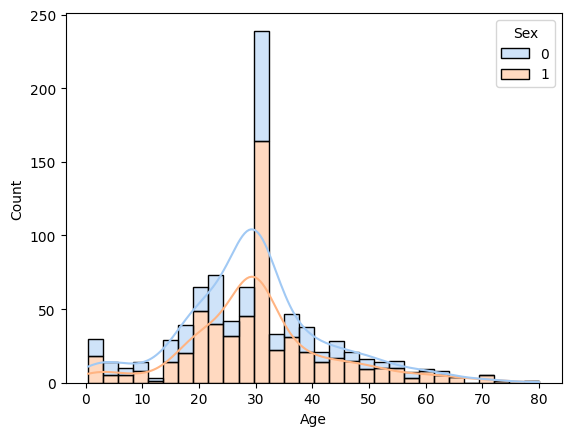

In [ ]:
sns.histplot(df, x="Age",hue="Sex",multiple="stack",palette="pastel", kde = True);

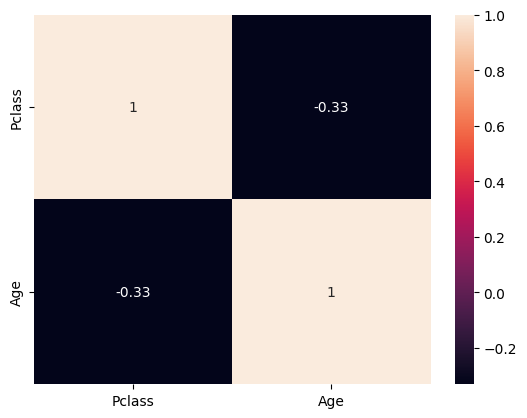

In [ ]:
sns.heatmap(df[["Pclass","Age"]].corr(), annot =True);